# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [5]:
x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
student_data = pd.DataFrame({'X': x_values, 'Y': y_values})

In [6]:
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='X', ylabel='Y'>

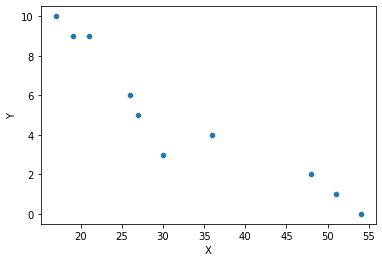

In [7]:

sns.scatterplot(x=student_data["X"], y=student_data["Y"])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

I see a trend, my hyphotesis is that tardies and age have a negative correlation. The older the student is, the fewer the tardies are

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
student_data[["X", "Y"]].cov()
#The covariance is -45.56

,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


In [9]:
(student_data[["X", "Y"]]).corr(method="pearson")
#The correlation is -0.939

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


The Pearson correlation coeficient is a way to interpret the covariance by dividing it times both standard deviation. It goes from 0 to 1 to express the relationship of two variables

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [10]:
#My outcome variable is going to be the number of tardies
#I´m going to use a linear regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(
    X = student_data["X"].to_frame(),
    y = student_data["Y"]
)

LinearRegression()

In [11]:
optimal_m = lr.coef_[0]
optimal_n = lr.intercept_
lr.intercept_

12.888803363135768

$tardies = -0.2428 * age + 12.8888$

Plot your regression model on your scatter plot.

In [12]:
student_data["best_prediction"] = optimal_m * student_data["X"] + optimal_n
student_data

,X,Y,best_prediction
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


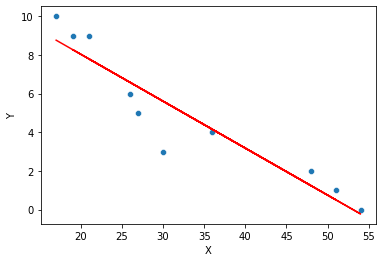

In [13]:
fig = plt.subplot()
sns.scatterplot(x=student_data["X"], y=student_data["Y"])
plt.plot(student_data["X"], student_data["best_prediction"], color = "r")

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [14]:
X = student_data["X"]
Y = student_data["Y"]

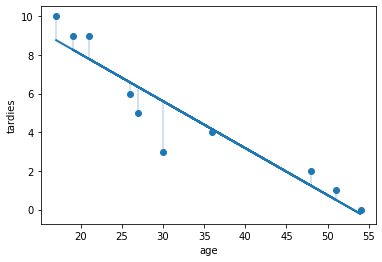

In [15]:
# regression line
y_hat = optimal_n + optimal_m * X
# plot the linear fit on top of the scatter
plt.scatter(X, Y)
plt.plot(X, y_hat, lw=2)
plt.vlines(X, y_hat, Y, lw=0.4)
plt.xlabel('age')
plt.ylabel('tardies')
plt.show()

There is clearly a negative relatinship between the two variables, but to double check we build the intervarls. 

In [16]:
#generate data
beta_1_hat_dist = []
beta_0_hat_dist = []

for _ in range(1000):
    beta_1 =  optimal_m 
    beta_0 = optimal_n
    num_points = 100
    X = np.random.normal(600, 150, num_points) # study hours

    # And the grades are...
    y = beta_0 + (beta_1 * X) + np.random.normal(loc=0, scale=5, size=num_points)
    data = pd.DataFrame({'tardies': y,
                         'age': X})
    # Compute confidence intervals with the resampling technique (will check results later)
    lr.fit(X=student_data["X"].to_frame(),
           y=student_data["Y"])

    beta_1_hat_dist.append(lr.coef_[0])
    beta_0_hat_dist.append(lr.intercept_)

In [17]:
params = beta_1_hat_dist
i_min = pd.Series(params).quantile(0.005)
i_max = pd.Series(params).quantile(0.995)
print(f'The 99% confidence interval is: {np.round(i_min,3), np.round(i_max, 3)}')

The 99% confidence interval is: (-0.243, -0.243)


La verdad que no termine de entender los resultados

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [18]:
vehicles = pd.read_csv("vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [19]:
df = vehicles.corr()
df2 = df["CO2 Emission Grams/Mile"]
df3 = df2.drop("Engine Displacement")
df4 = df3.drop("City MPG")
data = df4.drop("Highway MPG")
data
#The most the Fuel Barrels/Year
#The least

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(
    X = vehicles[["Cylinders", "Fuel Barrels/Year", "Year", "Combined MPG", "Fuel Cost/Year"]].astype(float),
    y = vehicles["CO2 Emission Grams/Mile"]
)

LinearRegression()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [22]:
CO2 = vehicles["CO2 Emission Grams/Mile"]
Fuel_barrels = vehicles["Fuel Barrels/Year"]
MPG = vehicles["Combined MPG"]
Fuel_cost = vehicles["Fuel Cost/Year"]
results = smf.ols("CO2 ~ Year + Cylinders + Fuel_barrels + MPG + Fuel_cost", data = vehicles).fit()
results.summary()
#REALLY CONFIDENT ON MY CONCLUSIONS!!!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.687e+05
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:15:33   Log-Likelihood:            -1.5173e+05
No. Observations:               35952   AIC:                         3.035e+05
Df Residuals:                   35946   BIC:                         3.035e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      769.8883     19.392     39.702      0.000     731.880     807.897
Year            -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders        1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_barrels    19.0529      0.061    311.600      0.000      18.933      19.173
MPG             -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_cost        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 